# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [ ]:
hdu = fits.open('data/Flat.15S0X1.V.14.fits')
header = hdu[0].header
print(header['exptime'])

## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [14]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil*FLAT.FIT')
print(flat_list)

['/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil105.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil75.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil90.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil15.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil0.625.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil1.25.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil65.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil0.3125.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil0.16.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil85.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil5.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil55.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil35.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil95.FLAT.FIT', '/Users/zllangford/Desktop/astr480/CCD/FITS/Pencil45.FLAT.FIT', '/Users/zllangford/Desktop/a

Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [50]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exposure']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

exp_times

Exposure time 105.0 sec
Mean counts: 34076.27

Exposure time 75.0 sec
Mean counts: 31235.74

Exposure time 90.0 sec
Mean counts: 32542.03

Exposure time 15.0 sec
Mean counts: 6514.27

Exposure time 0.63 sec
Mean counts: 402.87

Exposure time 1.25 sec
Mean counts: 698.58

Exposure time 65.0 sec
Mean counts: 27911.69

Exposure time 0.31 sec
Mean counts: 260.67

Exposure time 0.16 sec
Mean counts: 185.59

Exposure time 85.0 sec
Mean counts: 33109.37

Exposure time 5.0 sec
Mean counts: 1912.06

Exposure time 55.0 sec
Mean counts: 23804.44

Exposure time 35.0 sec
Mean counts: 15383.94

Exposure time 95.0 sec
Mean counts: 32454.10

Exposure time 45.0 sec
Mean counts: 19442.49

Exposure time 2.5 sec
Mean counts: 1255.83

Exposure time 25.0 sec
Mean counts: 11222.69



array([  0.16,   0.31,   0.63,   1.25,   2.5 ,   5.  ,  15.  ,  25.  ,
        35.  ,  45.  ,  55.  ,  65.  ,  75.  ,  85.  ,  90.  ,  95.  ,
       105.  ])

## Plot mean counts versus exposure time


No handles with labels found to put in legend.


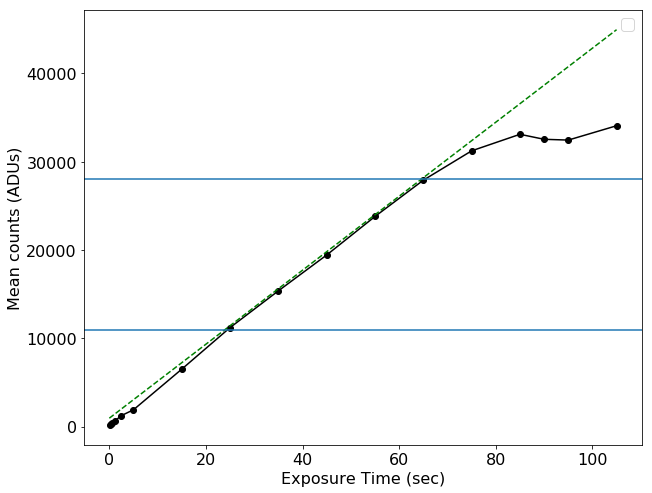

In [77]:
x = np.linspace(0, 105,10)

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
plt.plot(exp_times, means, '-ko')
plt.plot(x,419*x+960,'--g')
plt.axhline(11000)
plt.axhline(28000)
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts (ADUs)')
plt.legend()
plt.savefig('linearity.pdf')
plt.show()

[ 358.9571587  1246.85250615]
 
359 x + 1247


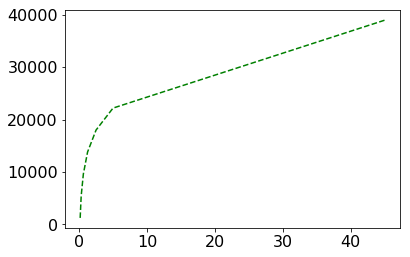

In [65]:

coefficients = np.polyfit(exp_times, means, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x)
print(coefficients)
print(polynomial)

plt.plot(exp_times[0:10], ys, '--g')

In [78]:
# Full Well at 85000 unbinned
# ADU Sat at 65536
28000*0.44 # ADU * e-/ADU = e-

12320.0

In [44]:
# Full Well at 
# ADU Sat at 65536
150000/1.6 # e- / (e-/ADU) = ADU

93750.0

In [45]:
75000/1.6

46875.0